In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df= pd.read_csv('Sample_main.csv')

In [3]:
df.head()

,CustomerCode,CountryName,USA,UK,Italy,Belgium,Romania,Australia,India,QtyRequired,...,Knotted,Jacquard,Handloom,Other,ShapeName,REC,Round,Square,AreaFt,Order Conversion
0,CC,INDIA,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,...,0,0,0,0,REC,1,0,0,80.0,1
1,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,REC,1,0,0,80.0,1
2,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,...,0,0,0,0,REC,1,0,0,80.0,1
3,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,REC,1,0,0,80.0,1
4,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,REC,1,0,0,80.0,1


In [5]:
df.columns

Index(['CustomerCode', 'CountryName', 'USA', 'UK', 'Italy', 'Belgium',
       'Romania', 'Australia', 'India', 'QtyRequired', 'ITEM_NAME',
       'Hand Tufted', 'Durry', 'Double Back', 'Hand Woven', 'Knotted',
       'Jacquard', 'Handloom', 'Other', 'ShapeName', 'REC', 'Round', 'Square',
       'AreaFt', 'Order Conversion'],
      dtype='object')

In [6]:
customer_code_mapping = {
    'A': ['A-9', 'A-6', 'A-11'],
    'B': ['B-3', 'B-2', 'B-4'],
    'C':['C-1', 'CC', 'RC', 'PC', 'C-2', 'C-3', 'CTS'],
    'E': ['E-2'],
    'F': ['F-1', 'F-2', 'F-6'],
    'G': ['G-1', 'G-4',],
    'H':['H-1', 'H-2'],
    'I': ['I-2'],
    'K':['K-2','K-3'],
    'L':['JL', 'L-2', 'L-5', 'L-4', 'L-3'],
    'M':['M-1', 'M-2'],
    'N':['N-1'],
    'P':['P-5', 'P-4'],
    'R':['R-4'],
    'S':['S-3','S-2'],
    'T':['T-6','T-9','T-4','T-4','T-5','T-2'],
    'V':['V-1']
}
def assign_main_customer_code(customer_code):
    for group, values in customer_code_mapping.items():
        if customer_code in values:
            return group
    return customer_code

# Apply the function to create a new column 'QualityGroup'
df['MainCustomerCode'] = df['CustomerCode'].apply(assign_main_customer_code)

# Create a new dataset with the relevant columns
grouped_CustomerCode_data = df[['CountryName', 'USA', 'UK', 'Italy', 'Belgium',
       'Romania', 'Australia', 'India', 'QtyRequired', 'ITEM_NAME',
       'Hand Tufted', 'Durry', 'Double Back', 'Hand Woven', 'Knotted',
       'Jacquard', 'Handloom', 'Other', 'ShapeName', 'REC', 'Round', 'Square',
       'AreaFt', 'Order Conversion', 'MainCustomerCode']].copy()

In [7]:
## Showing the unique value of each column

selected_columns = ['MainCustomerCode', 'CountryName', 'USA', 'UK', 'Italy', 'Belgium',
       'Romania', 'Australia', 'India', 'QtyRequired', 'ITEM_NAME',
       'Hand Tufted', 'Durry', 'Double Back', 'Hand Woven', 'Knotted',
       'Jacquard', 'Handloom', 'Other', 'ShapeName', 'REC', 'Round', 'Square',
       'AreaFt', 'Order Conversion']

for column in selected_columns:
    unique_values = grouped_CustomerCode_data[column].unique()
    num_unique_values = len(unique_values)
    print(f"{column} ({num_unique_values} unique values):\n{unique_values}\n")

# Display the total number of unique values for each column
unique_value_counts = grouped_CustomerCode_data[selected_columns].nunique()
print("Total number of unique values for each column:")
print(unique_value_counts)


MainCustomerCode (17 unique values):
['C' 'M' 'V' 'A' 'B' 'K' 'L' 'F' 'P' 'H' 'PD' 'T' 'E' 'I' 'S' 'N' 'TGT']

CountryName (14 unique values):
['INDIA' 'USA' 'AUSTRALIA' 'UK' 'POLAND' 'BELGIUM' 'CANADA' 'ITALY'
 'ROMANIA' 'UAE' 'SOUTH AFRICA' 'BRAZIL' 'CHINA' 'ISRAEL']

USA (3 unique values):
[ 0.  1. nan]

UK (3 unique values):
[ 0.  1. nan]

Italy (3 unique values):
[ 0. nan  1.]

Belgium (3 unique values):
[ 0. nan  1.]

Romania (3 unique values):
[ 0. nan  1.]

Australia (3 unique values):
[ 0.  1. nan]

India (3 unique values):
[ 1.  0. nan]

QtyRequired (41 unique values):
[  1   2  25  35   5   9  26  45  21  11  10   3   6  24   4  15  30  22
  50   8  12  27  28  40  20   7  55 200  13  14  32  18  17 136  16  64
 108 137  52 158  38]

ITEM_NAME (11 unique values):
['HAND TUFTED' 'DOUBLE BACK' 'KNOTTED' 'JACQUARD' 'HANDWOVEN' 'HANDLOOM'
 'DURRY' 'GUN TUFTED' 'POWER LOOM JACQUARD' 'TABLE TUFTED' 'INDO-TIBBETAN']

Hand Tufted (2 unique values):
[1 0]

Durry (2 unique values):
[0

In [8]:
grouped_CustomerCode_data.to_csv('grouped_CustomerCode_data.csv', index=False)
df1=pd.read_csv('grouped_CustomerCode_data.csv')

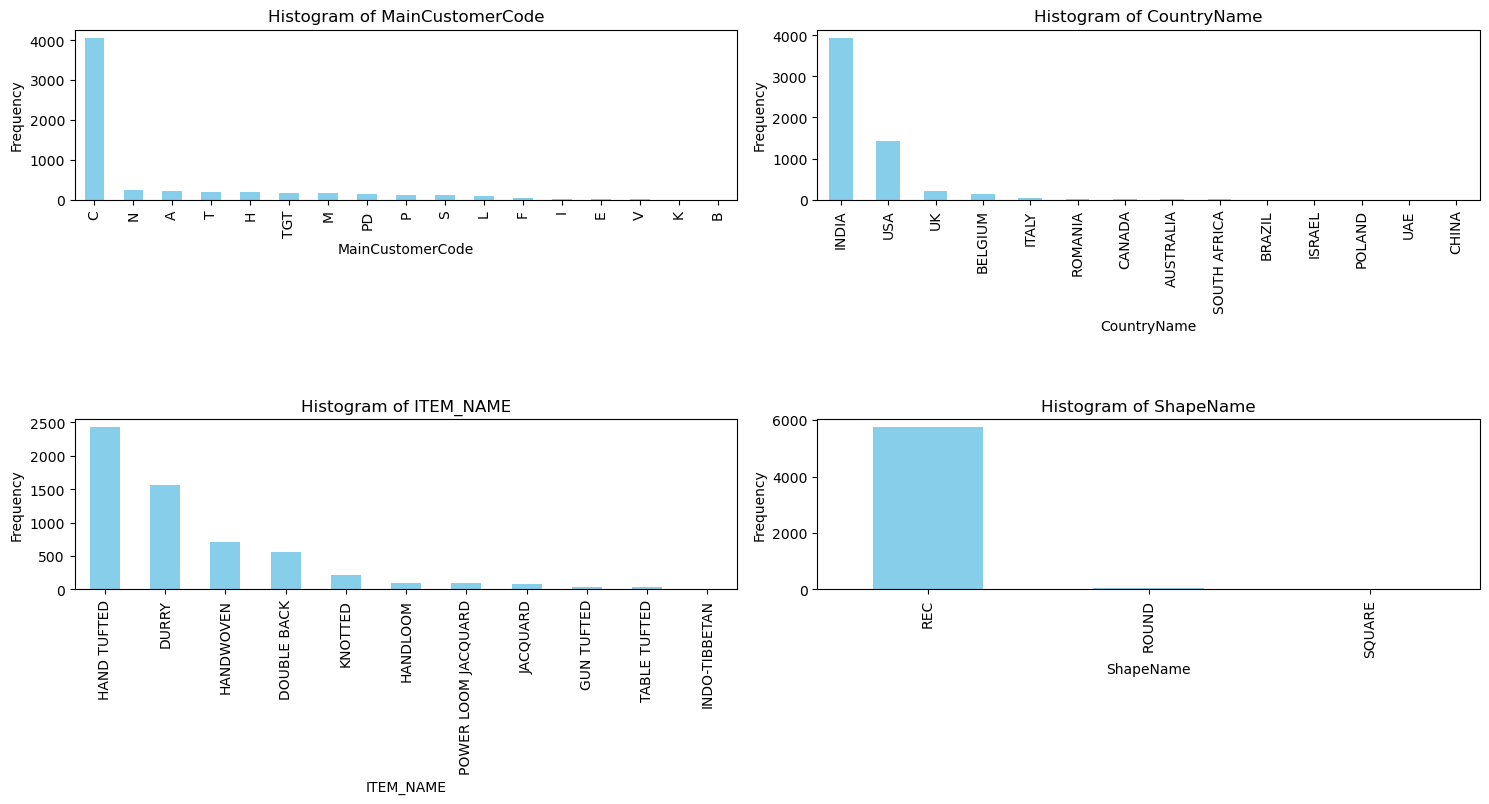

In [9]:
features_to_plot =['MainCustomerCode', 'CountryName', 'ITEM_NAME',
        'ShapeName']

# Plot histograms for each feature
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 2, i)
    df1[feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'flexibility' and 'difficulty' are categorical columns in your DataFrame
columns_to_label_encode = ['MainCustomerCode', 'CountryName', 'ITEM_NAME','ShapeName']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Create a dictionary to store the mapping of encoded values to original names
encoding_mapping = {}

# Apply label encoding to each specified column and store the mapping
for column in columns_to_label_encode:
    df1[column] = label_encoder.fit_transform(df1[column])
    encoding_mapping[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

    # Print the mapping for the current column
    print(f"\nMapping for {column}:")
    for encoded_value, original_name in encoding_mapping[column].items():
        print(f"{encoded_value} -> {original_name}")

# Now, df contains the label-encoded values for specified columns
# encoding_mapping contains dictionaries with mappings for each column
# Save the changes to the main dataset if needed
df1.to_csv('encoded12.csv', index=False)



Mapping for MainCustomerCode:
A -> 0
B -> 1
C -> 2
E -> 3
F -> 4
H -> 5
I -> 6
K -> 7
L -> 8
M -> 9
N -> 10
P -> 11
PD -> 12
S -> 13
T -> 14
TGT -> 15
V -> 16

Mapping for CountryName:
AUSTRALIA -> 0
BELGIUM -> 1
BRAZIL -> 2
CANADA -> 3
CHINA -> 4
INDIA -> 5
ISRAEL -> 6
ITALY -> 7
POLAND -> 8
ROMANIA -> 9
SOUTH AFRICA -> 10
UAE -> 11
UK -> 12
USA -> 13

Mapping for ITEM_NAME:
DOUBLE BACK -> 0
DURRY -> 1
GUN TUFTED -> 2
HAND TUFTED -> 3
HANDLOOM -> 4
HANDWOVEN -> 5
INDO-TIBBETAN -> 6
JACQUARD -> 7
KNOTTED -> 8
POWER LOOM JACQUARD -> 9
TABLE TUFTED -> 10

Mapping for ShapeName:
REC -> 0
ROUND -> 1
SQUARE -> 2


In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features and target variable
X = df1[['MainCustomerCode', 'CountryName', 'ITEM_NAME','ShapeName']]
y = df1['Order Conversion']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# KNN
knn_model = KNeighborsClassifier()
knn_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)
knn_model.fit(X_train_scaled, y_train)
knn_predictions = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Print the results
print("Decision Tree - Cross-Validation Accuracy Scores:", dt_scores)
print("Decision Tree - Test Accuracy:", dt_accuracy)
print("\nRandom Forest - Cross-Validation Accuracy Scores:", rf_scores)
print("Random Forest - Test Accuracy:", rf_accuracy)
print("\nKNN - Cross-Validation Accuracy Scores:", knn_scores)
print("KNN - Test Accuracy:", knn_accuracy)


Decision Tree - Cross-Validation Accuracy Scores: [0.8444206  0.86143931 0.8528464  0.86466165 0.87540279]
Decision Tree - Test Accuracy: 0.8702749140893471

Random Forest - Cross-Validation Accuracy Scores: [0.84334764 0.85714286 0.85177229 0.86251343 0.87540279]
Random Forest - Test Accuracy: 0.8702749140893471

KNN - Cross-Validation Accuracy Scores: [0.82939914 0.85821697 0.84210526 0.84747583 0.85821697]
KNN - Test Accuracy: 0.8487972508591065


##### Logistic Regression (Target variable "Order Conversion" with values 0 & 1")

In [28]:
from sklearn.linear_model import LogisticRegression
X = df1[['MainCustomerCode', 'CountryName', 'ITEM_NAME','ShapeName']]
y = df1['Order Conversion']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic_model = LogisticRegression(random_state = 0)
Logistic_model.fit(X_train, y_train)

Logistic_predictions = Logistic_model.predict(X_test_scaled)
Logistic_accuracy = accuracy_score(y_test, Logistic_predictions)
print("Logistic - Test Accuracy:", Logistic_accuracy)

Logistic - Test Accuracy: 0.8058419243986255


C:\Users\negar\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [32]:
from sklearn.linear_model import LogisticRegression
X = df1[['MainCustomerCode', 'ITEM_NAME']]
y = df1['Order Conversion']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic_model = LogisticRegression(random_state = 0)
Logistic_model.fit(X_train, y_train)

Logistic_predictions = Logistic_model.predict(X_test_scaled)
Logistic_accuracy = accuracy_score(y_test, Logistic_predictions)
print("Logistic - Test Accuracy:", Logistic_accuracy)

Logistic - Test Accuracy: 0.8032646048109966


C:\Users\negar\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Clustering

In [15]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df1[['MainCustomerCode', 'CountryName', 'ITEM_NAME','ShapeName']]
# Standardize features using StandardScaler
scaler = StandardScaler()
features_standardized = scaler.fit_transform(X)

# Choose the number of clusters (you may need to experiment with this)
num_clusters = 8

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(features_standardized)

# Add cluster labels to the DataFrame
df1['Cluster'] = clusters

# Display the results
print(df1[['Order Conversion', 'Cluster']])


C:\Users\negar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      Order Conversion  Cluster
0                    1        2
1                    1        4
2                    1        4
3                    1        4
4                    1        4
...                ...      ...
5815                 0        4
5816                 0        4
5817                 0        4
5818                 1        4
5819                 0        2

[5820 rows x 2 columns]


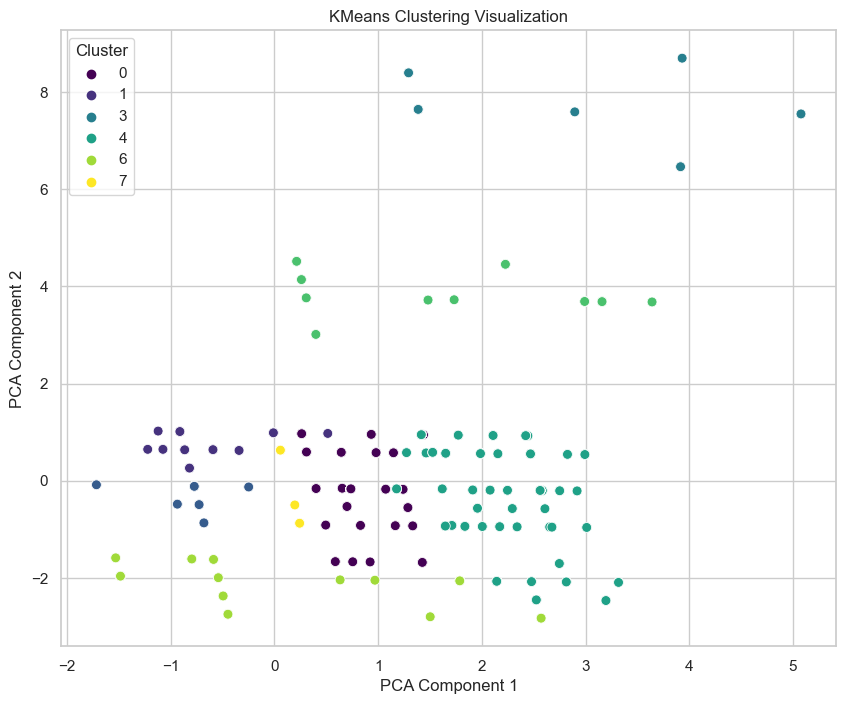

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_standardized)

# Add PCA components to the DataFrame
df1['PCA1'] = features_pca[:, 0]
df1['PCA2'] = features_pca[:, 1]

# Plot clusters using scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df1, palette='viridis', s=50)
plt.title('KMeans Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [17]:
from sklearn.metrics import silhouette_score

# Assuming 'features_standardized' and 'clusters' are already defined
silhouette_avg = silhouette_score(features_standardized, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.67


C:\Users\negar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\negar\anaconda3\Lib\site-packages\sklearn\clust

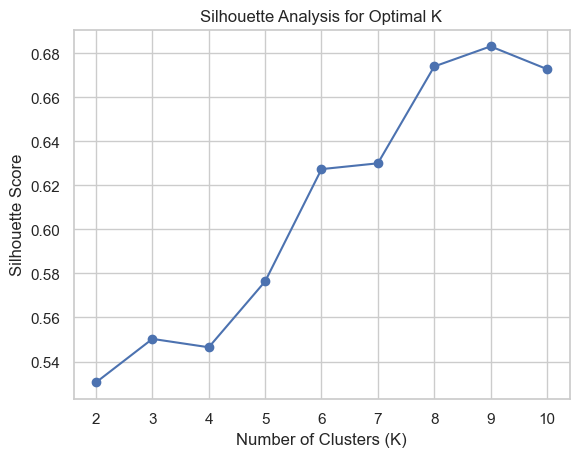

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Assuming features_standardized contains your standardized features
# You may need to replace it with the appropriate variable in your code
features_standardized = scaler.fit_transform(X)

# Set a range of K values to try
k_values = range(2, 11)  # You can adjust the range based on your dataset

# Store silhouette scores for each K
silhouette_scores = []

for k in k_values:
    # Fit KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(features_standardized)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(features_standardized, clusters)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()


### Run the model for K=9

In [19]:
X = df1[['MainCustomerCode', 'CountryName', 'ITEM_NAME','ShapeName']]
# Standardize features using StandardScaler
scaler = StandardScaler()
features_standardized = scaler.fit_transform(X)

# Choose the number of clusters (you may need to experiment with this)
num_clusters = 9

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(features_standardized)

# Add cluster labels to the DataFrame
df1['Cluster'] = clusters

# Display the results
print(df1[['Order Conversion', 'Cluster']])

C:\Users\negar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      Order Conversion  Cluster
0                    1        5
1                    1        4
2                    1        4
3                    1        4
4                    1        4
...                ...      ...
5815                 0        8
5816                 0        8
5817                 0        8
5818                 1        4
5819                 0        5

[5820 rows x 2 columns]


In [20]:
from sklearn.metrics import silhouette_score

# Assuming 'features_standardized' and 'clusters' are already defined
silhouette_avg = silhouette_score(features_standardized, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.68


### Neural Network

In [21]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [22]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

# Assuming dfn5 is your DataFrame

X = df1[['MainCustomerCode', 'CountryName', 'ITEM_NAME','ShapeName']]
y = df1['Order Conversion']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert target variable to categorical (one-hot encoding)
y_train_categorical = tf.keras.utils.to_categorical(y_train)
y_test_categorical = tf.keras.utils.to_categorical(y_test)

# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train_categorical, epochs=10, validation_data=(X_test_scaled, y_test_categorical), verbose=2)

# Make predictions
y_pred_categorical = model.predict(X_test_scaled)
y_pred = tf.argmax(y_pred_categorical, axis=1)

# Convert predictions to the same data type as y_test (integer)
y_pred_labels = y_pred.numpy()

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_labels))





Epoch 1/10


146/146 - 1s - loss: 0.4842 - accuracy: 0.8030 - val_loss: 0.4114 - val_accuracy: 0.8411 - 1s/epoch - 10ms/step
Epoch 2/10
146/146 - 0s - loss: 0.4019 - accuracy: 0.8424 - val_loss: 0.3954 - val_accuracy: 0.8548 - 400ms/epoch - 3ms/step
Epoch 3/10
146/146 - 0s - loss: 0.3920 - accuracy: 0.8443 - val_loss: 0.3870 - val_accuracy: 0.8574 - 371ms/epoch - 3ms/step
Epoch 4/10
146/146 - 0s - loss: 0.3871 - accuracy: 0.8471 - val_loss: 0.3959 - val_accuracy: 0.8531 - 361ms/epoch - 2ms/step
Epoch 5/10
146/146 - 0s - loss: 0.3827 - accuracy: 0.8512 - val_loss: 0.3842 - val_accuracy: 0.8565 - 370ms/epoch - 3ms/step
Epoch 6/10
146/146 - 0s - loss: 0.3819 - accuracy: 0.8492 - val_loss: 0.3840 - val_accuracy: 0.8574 - 365ms/epoch - 3ms/step
Epoch 7/10
146/146 - 0s - loss: 0.3786 - accuracy: 0.8486 - val_loss: 0.3844 - val_accuracy: 0.8634 - 402ms/epoch - 3ms/step
Epoch 8/10
146/146 - 0s - loss: 0.3781 - accuracy: 0.8542 - val_loss: 0.3893 - val_accuracy: 0.8617 - 370ms/epoch - 3ms/st